In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import ndimage
from sklearn.decomposition import PCA

import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\retina_python\\Modules')
except:
    os.chdir('Modules')
from time_shifted_PID import MIfunc
from time_shifted_PID import EqualState
from Spike_Generation import SG
from Spike_Generation import NL

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb


In [3]:
exp_folder = 'D:\\GoogleDrive\\retina\\Troy\'s data\\20210908\\SplitData\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20210720\\SplitData\\'
exp_folder = 'D:\\GoogleDrive\\retina\\Exps\\2021\\1130\\SplitData\\'
cn = 50

# PCA of TKs

In [4]:
Mean = 10
contrast_list = [0.1,0.2,0.3]
WNSTA_list = []
ExpSTA_list = []
for contrast in contrast_list:
    filename = 'diode_WhiteNoise_mean='+str(Mean)+'_C='+str(contrast)+'_0'
    loadfiles = np.load(exp_folder+'STA\\STA_'+filename+'.npz', allow_pickle=True)
    for k in loadfiles.files:
        vars()[k] = loadfiles[k][()]
    WNSTA_list.append(STA_cell.copy())

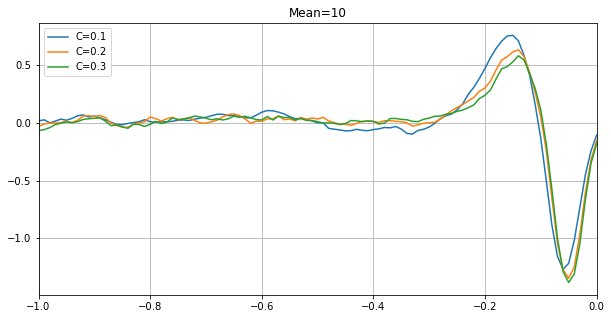

In [5]:
for i in range(len(contrast_list)):
    plt.plot(timeshift, WNSTA_list[i][cn-1], label = 'C='+str(round(contrast_list[i],3)))

plt.legend()
plt.grid('on')
plt.xlim(-1,0)
plt.title('Mean='+str(Mean))
plt.gcf().set_size_inches(10,5)

In [6]:
X = np.zeros((101,5))
for i in range(len(contrast_list)):
    X[:,i] = WNSTA_list[i][cn-1][:101]

In [7]:
pca=PCA(n_components=2)
PC = pca.fit(X).transform(X)

In [8]:
pca=PCA(n_components=2)
pca_struct = pca.fit(X)
PC = pca_struct.transform(X)

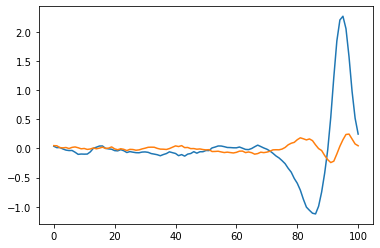

In [9]:
plt.plot(PC[:,0])
plt.plot(PC[:,1])

In [10]:
pca_corr = np.zeros((2,5))
for i in range(len(contrast_list)):
    pca_corr[0,i] = np.sum(PC[:,0]*WNSTA_list[i][cn-1][:101])
    pca_corr[1,i] = np.sum(PC[:,1]*WNSTA_list[i][cn-1][:101])

Text(0, 0.5, 'PC2')

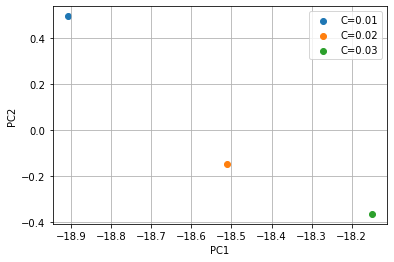

In [11]:
for i in range(len(contrast_list)):
    plt.scatter(pca_corr[0,i], pca_corr[1,i], label = 'C='+str(round(contrast_list[i]/Mean,3)))

plt.legend(loc='best')
plt.grid('on')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(-1,0)
# plt.title('Mean='+str(Mean))
# plt.gcf().set_size_inches(10,5)

# PCA of all (across different contrast) spike triggered

In [28]:
import warnings
warnings.simplefilter('ignore')

dt = 0.01
window = [-1,0] # second
stepshift = np.arange(window[0]/dt, window[1]/dt+1, dtype = int)

scontrastling_rate = 20000
STcollection_file = []
for contrast in contrast_list:
    filename = 'diode_WhiteNoise_mean='+str(Mean)+'_C='+str(contrast)+'_01-Dec-2021_0'
    annots = loadmat(exp_folder+filename, squeeze_me = True)
   
    TicTocer = annots['a_data'][1]
    startPoint = np.where(TicTocer>38000)[0][0]
    endPoint = np.where(TicTocer>38000)[0][-1]
    x = annots['a_data'][0, startPoint:endPoint+1]
    x = np.convolve(x, np.ones(int(scontrastling_rate*dt*0.5))/int(scontrastling_rate*dt*0.5), 'same')
    x = x[int(scontrastling_rate*dt*0.5)::int(scontrastling_rate*dt)]
    x = x.astype(float)
    # x = ((x-np.mean(x))/np.std(x)*contrast + 1) *Mean
    x = (x-np.mean(x))/np.std(x)
    tEdge = np.arange(len(x)+1)*dt

    Spike = annots['Spikes'][cn-1]
    Spike = Spike[np.where(Spike>startPoint/scontrastling_rate)[0][0]:np.where(Spike<endPoint/scontrastling_rate)[0][-1]]-startPoint/scontrastling_rate
    rstate, _ = np.histogram(Spike, tEdge)
    
    STcollection = np.zeros((1,len(stepshift)))
    for i in np.arange(-stepshift[0],len(rstate)-stepshift[-1]):
        for spike in range(rstate[i]):
            STcollection = np.vstack((STcollection, x[i+stepshift]))
    
    STcollection_file.append(STcollection[1:,:])


In [29]:
allCollection = np.zeros((1,len(stepshift)))
for STcollection in STcollection_file:
    allCollection = np.vstack((allCollection, STcollection))
allCollection = allCollection[1:,:]

In [30]:
pca=PCA(n_components=2)
pca_struct = pca.fit(allCollection.T)
PC = pca_struct.transform(allCollection.T)

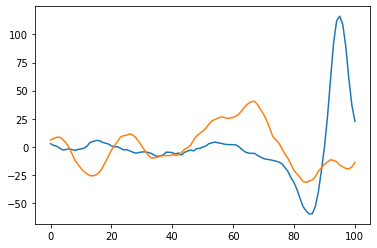

In [31]:
plt.plot(PC[:,0])
plt.plot(PC[:,1])

In [32]:
pca_corr_file = [np.vstack((np.sum(PC[:,0][np.newaxis,:]*STcollection, axis=1),np.sum(PC[:,1][np.newaxis,:]*STcollection, axis=1))) for STcollection in STcollection_file]

Text(0, 0.5, 'PC2')

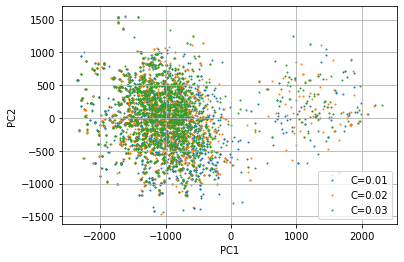

In [33]:
for i in range(len(contrast_list)):
    plt.scatter(pca_corr_file[i][0,:], pca_corr_file[i][1,:], s=1, label = 'C='+str(round(contrast_list[i]/Mean,3)))
    

plt.legend(loc='best')
plt.grid('on')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.xlim(-1,0)
# plt.title('Mean='+str(Mean))
# plt.gcf().set_size_inches(10,5)

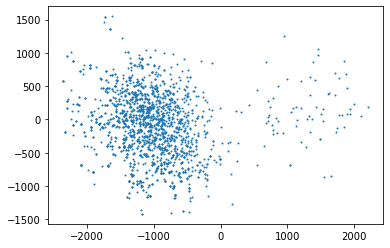

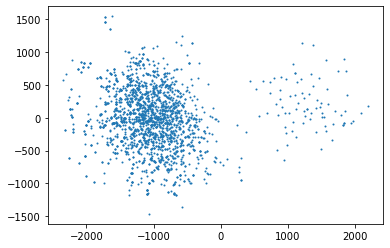

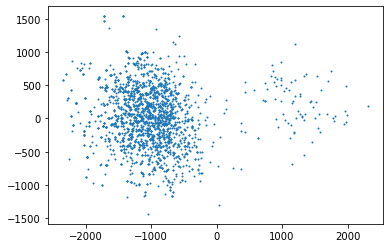

In [34]:
for i in range(len(contrast_list)):
    plt.scatter(pca_corr_file[i][0,:], pca_corr_file[i][1,:], s=1, label = 'C='+str(round(contrast_list[i]/Mean,3)))
    plt.show()